<a href="https://colab.research.google.com/github/sreeharinikarthikeyan/MACHINELEARNING/blob/main/cnn_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip '/content/drive/MyDrive/deep learning practise/archive (19).zip' -d '/content/drive/MyDrive/deep learning practise/image folder'

Archive:  /content/drive/MyDrive/deep learning practise/archive (19).zip
replace /content/drive/MyDrive/deep learning practise/image folder/Small Home Objects (SHO) Image Dataset/BallMain/Color/100Color.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

In [ ]:
# get image
filepath = "/content/drive/MyDrive/deep learning practise/image folder/Small Home Objects (SHO) Image Dataset/BallMain/Color/100Color.jpg"
img = PIL.Image.open(filepath)

# get width and height
width = img.width
height = img.height

# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  631
The width of the image is:  701


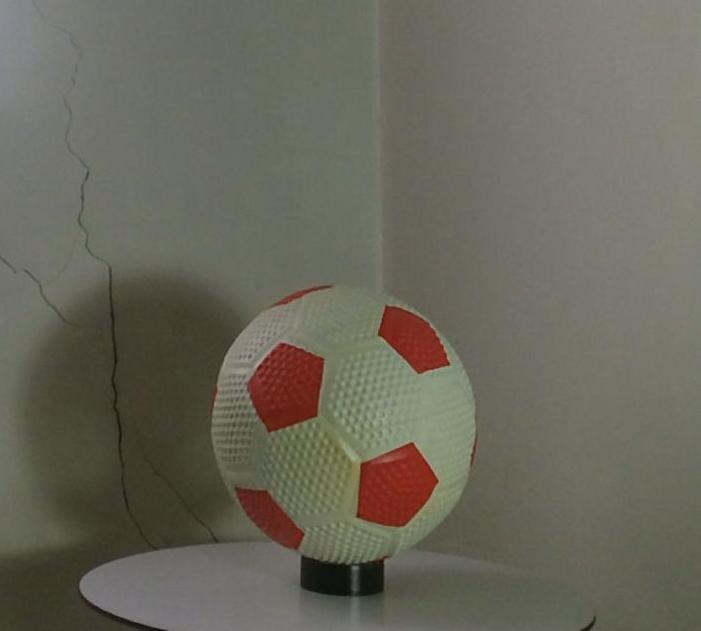

In [ ]:
PIL.Image.open(str(filepath))

In [ ]:
data_dir='/content/drive/MyDrive/deep learning practise/image folder/Small Home Objects (SHO) Image Dataset'

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(500,500),batch_size=13)

Found 4160 files belonging to 13 classes.
Using 3328 files for training.


In [ ]:
test_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(500,500),batch_size=13)

Found 4160 files belonging to 13 classes.
Using 832 files for validation.


In [ ]:
from tensorflow.keras import layers

In [ ]:
my_model=Sequential([
    layers.Rescaling(1./255,input_shape=(500,500,3)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(96,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(13)
])

In [ ]:
my_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=my_model.fit(train_ds, validation_data= test_ds, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
256/256 [==============================] - 699s 3s/step - loss: 0.9465 - accuracy: 0.8245 - val_loss: 0.0475 - val_accuracy: 0.9820
Epoch 2/10
256/256 [==============================] - 58s 226ms/step - loss: 0.0079 - accuracy: 0.9982 - val_loss: 3.4085e-05 - val_accuracy: 1.0000
Epoch 3/10
256/256 [==============================] - 60s 230ms/step - loss: 1.2292e-05 - accuracy: 1.0000 - val_loss: 1.6817e-05 - val_accuracy: 1.0000
Epoch 4/10
256/256 [==============================] - 58s 224ms/step - loss: 6.6946e-06 - accuracy: 1.0000 - val_loss: 1.0118e-05 - val_accuracy: 1.0000
Epoch 5/10
256/256 [==============================] - 59s 228ms/step - loss: 4.0817e-06 - accuracy: 1.0000 - val_loss: 6.9650e-06 - val_accuracy: 1.0000
Epoch 6/10
256/256 [==============================] - 59s 228ms/step - loss: 2.3942e-06 - accuracy: 1.0000 - val_loss: 4.9324e-06 - val_accuracy: 1.0000
Epoch 7/10
256/256 [==============================] - 59s 227ms/step - loss: 1.8100e-06 - accura

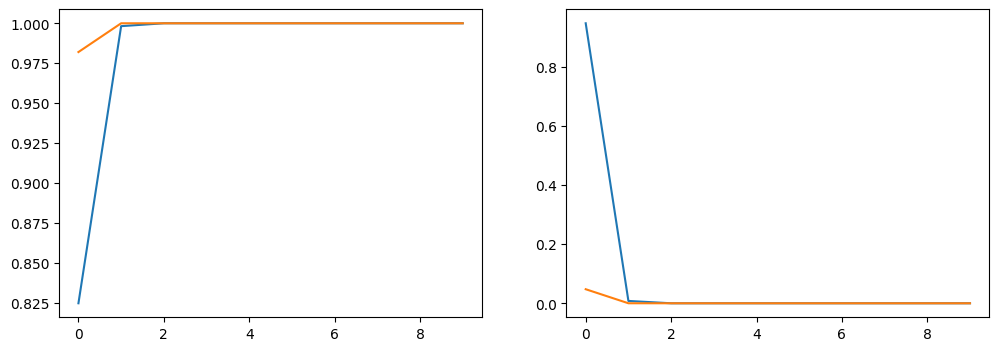

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training acc')
plt.plot(history.history['val_accuracy'],label='validation acc')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')

In [ ]:
predicted=my_model.predict(test_ds)

64/64 [==============================] - 6s 89ms/step


In [ ]:
predicted

array([[ 76.139175 , -39.87567  , -17.633883 , ...,  -3.3588257,
        -22.496431 ,   0.4856768],
       [-26.9347   ,   9.123232 , -21.838703 , ..., -13.082783 ,
          7.4991436, -11.242655 ],
       [  2.3018904,  -3.1524186, -12.358264 , ...,  27.727911 ,
        -10.588162 ,  -2.9336147],
       ...,
       [  3.7427728, -24.9094   ,  32.07978  , ...,   6.852955 ,
        -11.355302 ,  -9.212336 ],
       [ -5.0866575,  -0.7379709, -11.237115 , ...,  -7.0686297,
         -0.7029642,  -4.363184 ],
       [-26.646544 ,   8.856452 , -21.68727  , ..., -13.060597 ,
          7.614958 , -10.978044 ]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip ('/content/drive/MyDrive/deep learning practise/archive (19).zip') -d ('/content/drive/MyDrive/deep learning practise')

/bin/bash: -c: line 1: syntax error near unexpected token `'/content/drive/MyDrive/deep learning practise/archive (19).zip''
/bin/bash: -c: line 1: `unzip ('/content/drive/MyDrive/deep learning practise/archive (19).zip') -d ('/content/drive/MyDrive/deep learning practise')'


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#path,validation_split, subset,seed, image_size,batch_size
train_ds=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/deep learning practise/image folder/Small Home Objects (SHO) Image Dataset',validation_split=0.2,subset='training',seed=45,image_size=(300,300),batch_size=13)

Found 4160 files belonging to 13 classes.
Using 3328 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/deep learning practise/image folder/Small Home Objects (SHO) Image Dataset',validation_split=0.2,subset='validation',seed=45,image_size=(300,300),batch_size=13)

Found 4160 files belonging to 13 classes.
Using 832 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

In [ ]:
#CNN model - Rescaling,Conv2D,MaxPooling2D,Dropout,Flatten,Dense
my_model= Sequential([
    layers.Rescaling(1./255,input_shape=(300,300,3)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(13)
])

In [ ]:
#compilation loss, optimizer metrics
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#training dataset, val dataset, epoch, batch_size, verbose
history=my_model.fit(train_ds,validation_data=val_ds,epochs=3,batch_size=13,verbose=1)

Epoch 1/3
256/256 [==============================] - ETA: 0s - loss: -24.0975 - accuracy: 0.0766